In [9]:
import sympy as sp

In [10]:
x, phi = sp.symbols(r'x \phi')
k, b, y = sp.symbols(r'k b y', positive=True)

f_1 = k*(x-phi) + b
f_2 = -k*(x-phi) + b


def calculate_intervals(density_functions: list):
    start = sp.solve(density_functions[0], x)[0]
    end = sp.solve(density_functions[1], x)[0]
    middle = (end - start)/2 + start
    middle = middle.simplify()
    return [sp.Interval(start, middle), sp.Interval(middle, end)]

intervals = calculate_intervals([f_1, f_2])
intervals[0]

Interval(\phi - b/k, \phi)

In [11]:
intervals[1]

Interval(\phi, \phi + b/k)

In [12]:
def integrate_functions_on_intervals(functions, intervals:list[sp.Interval]):
    integrals = []
    for fun, interval in zip(functions, intervals):
        I = sp.integrate(fun, (x, interval.start, interval.end)).simplify()
        for i in integrals:
            I = I + i
        integrals.append(I)
    return integrals

Is = integrate_functions_on_intervals([f_1, f_2], intervals)
Is[0].simplify()

b**2/(2*k)

In [13]:
Is[1].simplify()

b**2/k

In [14]:
def check_normalization_condition_b(integrals):
    # condition = 0
    # for i in integrals:
    #     condition += i
    
    condition = integrals[-1]
    solution = sp.solve(condition - 1, b)
    # K> 0 возьмём положительное значение
    for sol in solution:
        
        if sp.solveset(sol > 0, k, domain=sp.Interval(0, sp.oo)):
            return sol

b_val = check_normalization_condition_b(Is)
b_val

sqrt(k)

## Упрощённый вид

In [15]:
f_1 = f_1.subs(b, b_val)
f_1

sqrt(k) + k*(-\phi + x)

In [16]:
f_2 = f_2.subs(b, b_val)
f_2

sqrt(k) - k*(-\phi + x)

In [17]:
intervals = calculate_intervals([f_1, f_2])
intervals[0]

Interval(\phi - 1/sqrt(k), \phi)

In [18]:
intervals[1]

Interval(\phi, \phi + 1/sqrt(k))

In [19]:
def calculate_distribution_function(functions, intervals):
    integrals = []
    calculated_integrals = integrate_functions_on_intervals(functions, intervals)
    tail = 0
    for fun, interval, calculated in zip(functions, intervals, calculated_integrals):
        I = sp.integrate(fun, (x, interval.start, x)) + tail
        tail = calculated
        integrals.append(I)
    return integrals
distribution_functions = calculate_distribution_function([f_1, f_2], intervals)
print(distribution_functions)
distribution_functions[0].simplify()

[k*x**2/2 - k*(\phi - 1/sqrt(k))**2/2 + x*(-\phi*k + sqrt(k)) - (\phi - 1/sqrt(k))*(-\phi*k + sqrt(k)), \phi**2*k/2 - \phi*(\phi*k + sqrt(k)) - k*x**2/2 + x*(\phi*k + sqrt(k)) + 1/2]


\phi**2*k/2 - \phi*sqrt(k) - \phi*k*x + sqrt(k)*x + k*x**2/2 + 1/2

In [20]:
distribution_functions[1].simplify()

-\phi**2*k/2 - \phi*sqrt(k) + \phi*k*x + sqrt(k)*x - k*x**2/2 + 1/2

In [21]:
distribution_functions[0].simplify().subs(x, intervals[0].end).simplify()

1/2

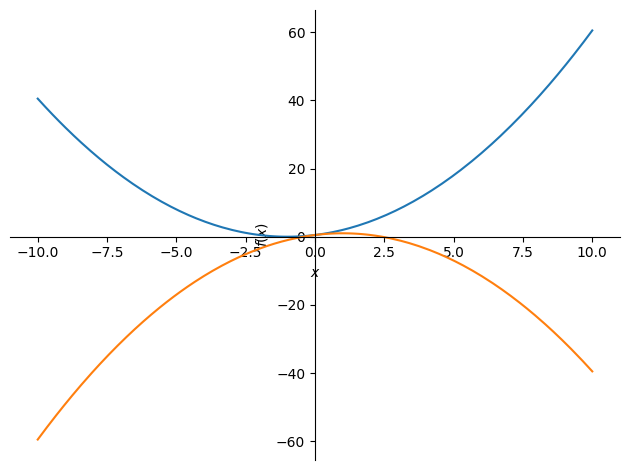

In [22]:
phi_val = 0
k_val = 1
sp.plot(distribution_functions[0].subs(k, k_val).subs(phi, phi_val), distribution_functions[1].subs(k, k_val).subs(phi, phi_val), (x, -10, 10))

In [23]:
distribution_functions[1].simplify().subs(x, intervals[1].end).simplify()

1

In [24]:
def calculate_inverse_functions(distribution_functions):
    inverse_functions = []
    for func in distribution_functions:
        solution = sp.solve(func - y, x)
        # print(solution[1].subs(y, 1/2).simplify())
        print(solution)
        # print(sp.solveset(solution[0]> 0, y, domain=sp.Interval(0, 1)))
        inverse_functions.append(solution)
        #просто вычислить оба и взять то которое принадлежит интервалу надеюсь прокатит
calculate_inverse_functions(distribution_functions)


[(\phi*sqrt(k) - sqrt(2)*sqrt(y) - 1)/sqrt(k), (\phi*sqrt(k) + sqrt(2)*sqrt(y) - 1)/sqrt(k)]
[(\phi*sqrt(k) - sqrt(2 - 2*y) + 1)/sqrt(k), (\phi*sqrt(k) + sqrt(2 - 2*y) + 1)/sqrt(k)]


## Матожидание

In [25]:
Is = integrate_functions_on_intervals([f_1*x, f_2*x], intervals)
M = Is[-1]
M

\phi

## Дисперсия 

In [ ]:
Is = integrate_functions_on_intervals([f_1*(x-M)**2, f_2*(x-M)**2], intervals)
D = Is[-1]
D

1/(6*k)

: 